In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


from pygraphon.graphons import graphon_log, graphon_logit_sum
from pygraphon.utils.utils_graph import edge_density
from pygraphon.graphons.StepGraphon import StepGraphon
from pygraphon.plots.plot_matrices import spy

from pygraphon.estimators import HistogramEstimator, SAS
from pygraphon.norm import MseProbaEdge

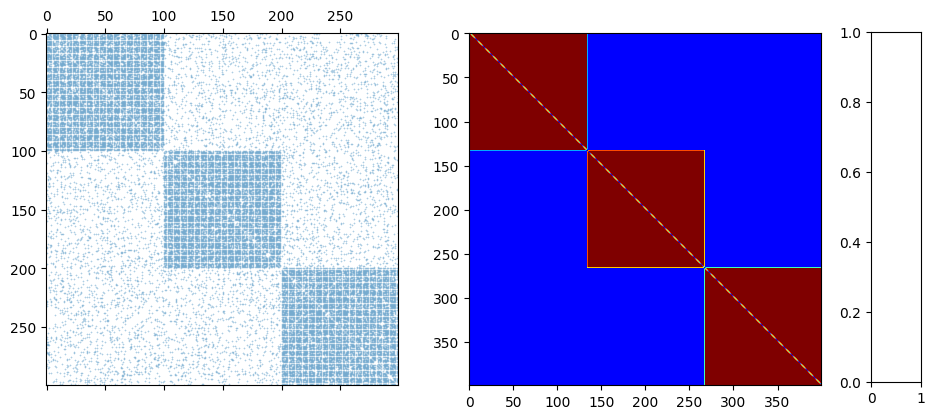

In [60]:
#Set the matrix of theta
graphon_matrix = np.array([[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]])
#set up normalised graphon with graphon
graphon = StepGraphon(graphon_matrix,1/3)
#graphon = graphon_logit_sum


A = graphon.draw(rho = 1,n = 300, exchangeable=False)
norm = MseProbaEdge(n_nodes = 500)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
im = ax[1].imshow(graphon._get_edge_probabilities(400,False,True), cmap='jet')
_ = spy(A, ax=ax[0])
#ax[0].imshow(A.astype(int), cmap='jet')
plt.show()

Initial log-likelihood: -21244.509161559272
fast normalized ll: -0.473679134036996
Initial normalized log-likelihood: -1.422845700995196


LL: -0.2730,  4 global improvements: 100%|██████████| 100/100 [01:35<00:00,  1.04it/s]


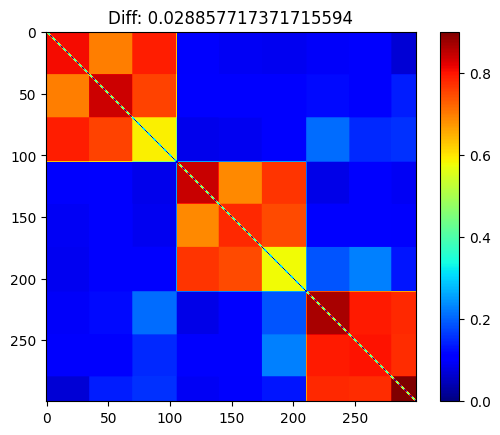

In [61]:
hist = HistogramEstimator(method = "matlab")
hist.fit(graph= A, bandwidthHist= None)
diff = norm(graphon, hist)
plt.imshow(hist.get_graphon()._get_edge_probabilities(300,False,True), cmap = "jet")
plt.title(f"Diff: {diff}")
plt.colorbar()

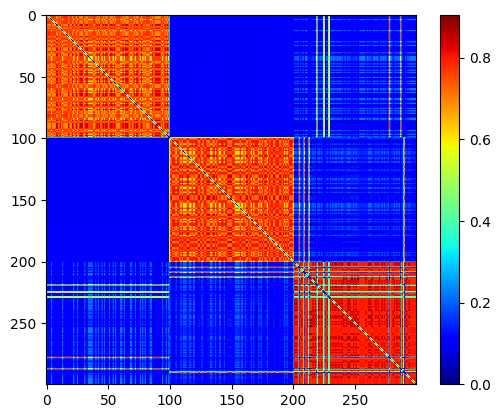

In [62]:
plt.imshow(hist.get_edge_connectivity(), cmap = "jet")
plt.colorbar()
plt.show()

Log likelihood: -0.4084:   6%|▌         | 6/100 [00:02<00:32,  2.93it/s]


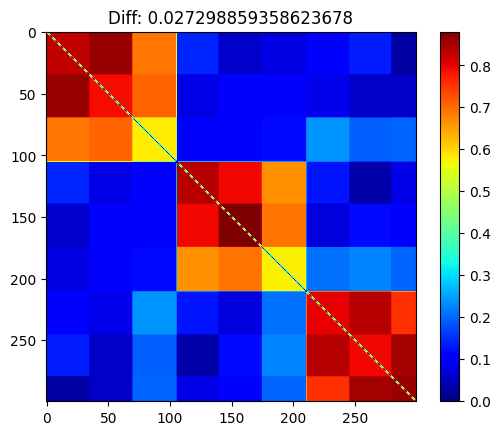

In [66]:
my_hist = HistogramEstimator()
my_hist.fit(graph= A, bandwidthHist= None,tol = 1e-10)
diff = norm(graphon, my_hist)
plt.imshow(my_hist.get_graphon()._get_edge_probabilities(300,False,True), cmap = "jet")
plt.title(f"Diff: {diff}")
plt.colorbar()

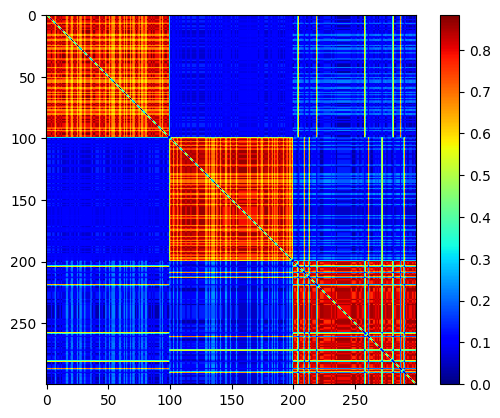

In [67]:
plt.imshow(my_hist.get_edge_connectivity(), cmap = "jet")
plt.colorbar()
plt.show()

# Test on pollblog dataset

yep that's the only one where we have a number

In [89]:
import networkx as nx
G = nx.read_edgelist("network.csv/edges.csv", delimiter = ",", create_using=nx.Graph())
A = nx.to_numpy_array(G)
A = A[np.sum(A, axis = 1) > 0].astype(int)
A[np.diag_indices_from(A)] = 0

h 73


Log likelihood: -0.0643:  21%|██        | 105/500 [00:38<02:23,  2.76it/s]

Converged with normalized ll: -2.8803


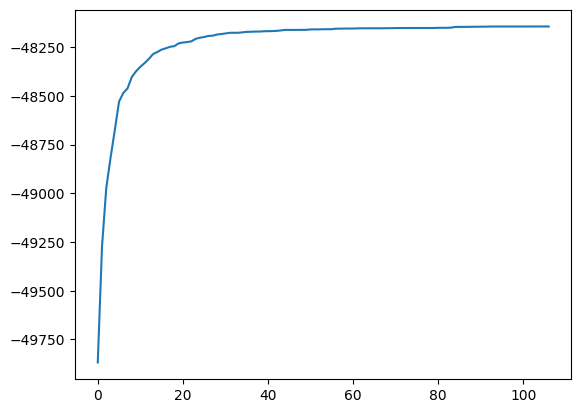

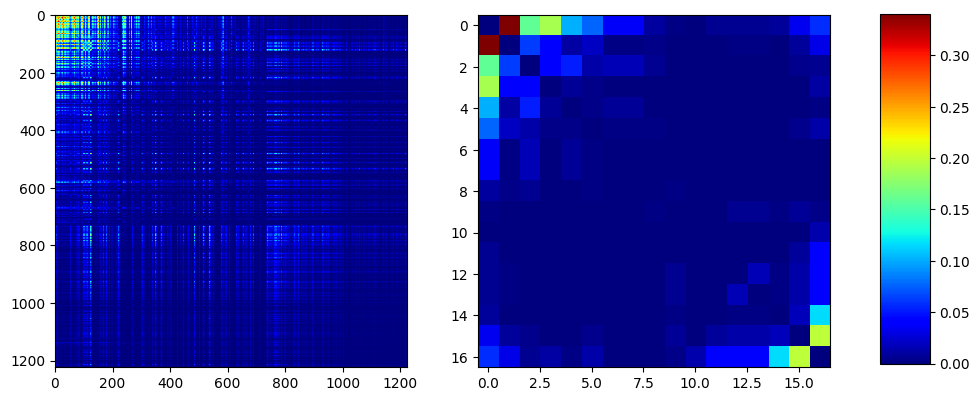

In [122]:
my_hist = HistogramEstimator()
my_hist.fit(graph= A, bandwidthHist= None,absTol = 1e-10, past_non_improving= 100)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
im = ax[1].imshow(my_hist.get_graphon()._get_edge_probabilities(17,False,True), cmap='jet')
ax[0].imshow(my_hist.get_edge_connectivity(), cmap='jet')
plt.colorbar(im, cax=cbar_ax)
plt.show()

h 73
Initial log-likelihood: -49868.09652905405
fast normalized ll: -0.06662617976936341
Initial normalized log-likelihood: -2.9834338336257282


LL: -0.0578,  3 global improvements:  29%|██▉       | 145/500 [02:11<05:21,  1.10it/s]


3 consecutive likelihood improvements less than specified tolerance; quitting now
Best LL: -0.0578


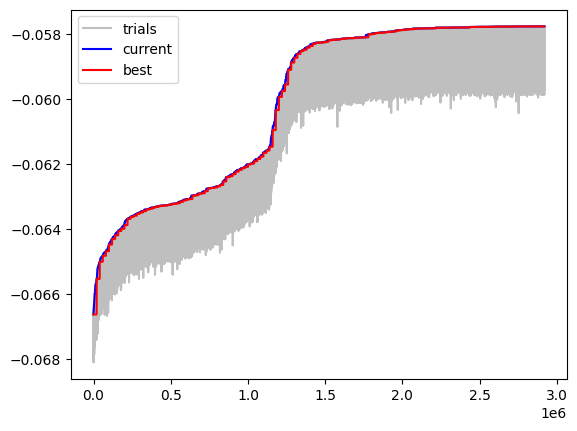

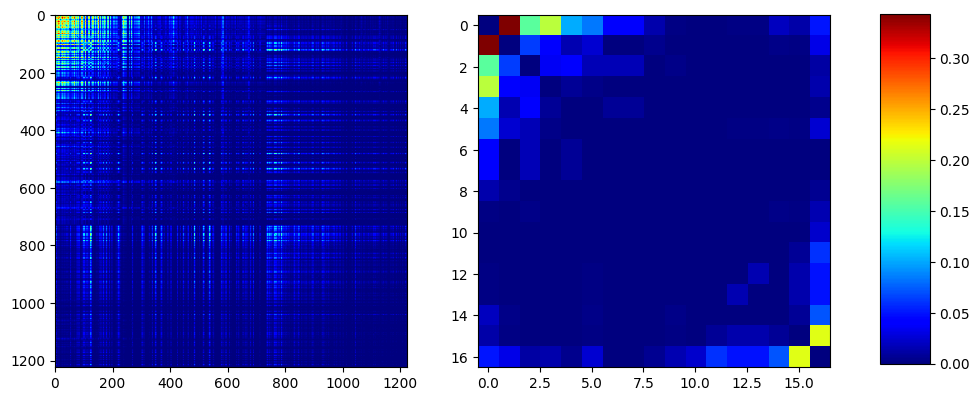

In [123]:
hist = HistogramEstimator(method = "matlab")
hist.fit(graph= A, bandwidthHist= None)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
im = ax[1].imshow(hist.get_graphon()._get_edge_probabilities(17,False,True), cmap='jet')
ax[0].imshow(hist.get_edge_connectivity(), cmap='jet')
plt.colorbar(im, cax=cbar_ax)
plt.show()